In [1]:
import json
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

file=open('6.json')

In [2]:
data=json.load(file)

In [3]:
points=np.array(data['layers'][0]['paths'][0]['points'])

(-0.5, 2538.5, 1519.5, -0.5)

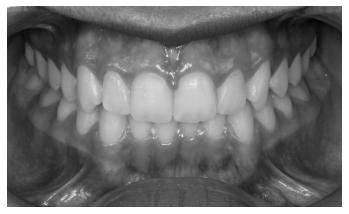

In [4]:
photo=cv2.imread('6_Sample6.jpeg',0)
#photo=np.round(photo**1.7)
#photo=cv2.threshold(photo,127,12334,cv2.THRESH_BINARY)
plt.imshow(np.round(photo),cmap='gray')
plt.axis('off')

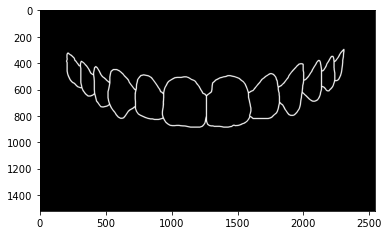

In [5]:
new=np.zeros(np.shape(photo))
n=np.array(data['layers'][0]['paths']).size
for q in range(n):
    c=0
    points=data['layers'][0]['paths'][q]['points']
    for point in points:

        if(c==0):
            last_y=np.int(np.round(point[1]))
            last_x=np.int(np.round(point[0]))
            first_y=np.int(np.round(point[1]))
            first_x=np.int(np.round(point[0]))
            c=1
    
            continue
        else:
            y=np.int(np.round(point[1]))
            x=np.int(np.round(point[0]))
            the_point=point
            cv2.line(new,(last_x,last_y),(x,y),(255,0,0),thickness=7)
            last_y=y
            last_x=x
        if(point==points[-1]):
            cv2.line(new,(first_x,first_y),(x,y),(255,0,0),thickness=7)
        
    
plt.imshow(new,cmap='gray')        

In [6]:
tresh=new.astype('uint8')

In [7]:
contours,hie=cv2.findContours(tresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [8]:
tt=0
c_p=[]
for i in range(1,np.shape(contours)[0]):
    number_of_conturs_pixels=contours[i].shape[0]
    this_contur_pixels=pd.DataFrame(np.reshape(contours[i],(number_of_conturs_pixels,2)))
    x_min=np.min(this_contur_pixels.iloc[:,0])
    x_max=np.max(this_contur_pixels.iloc[:,0])
    pixels=[]
    for x in range(x_min,x_max):
        df=this_contur_pixels.loc[this_contur_pixels.iloc[:,0]==x]
        if(df.size==0):
            tt+=1
            continue
        y_max=np.int(df.iloc[:,1].max())
        y_min=np.int(df.iloc[:,1].min())
        for y in range(y_min,y_max):
            pixels.append([y,x])

    y_min=np.min(this_contur_pixels.iloc[:,1])
   # print(y_min)
    y_max=np.max(this_contur_pixels.iloc[:,1])
   # print(y_max)
    for y in range(y_min,y_max+1):
        df=this_contur_pixels.loc[this_contur_pixels.iloc[:,1]==y]
        if(df.size==0):
            tt+=1
            continue
        x_max=np.int(df.iloc[:,0].max())
        x_min=np.int(df.iloc[:,0].min())
        for x in range(x_min,x_max+1):
            pixels.append([y,x])
            #print(y,'================')

    c_p.append(pixels)
    
            
        

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [9]:
m=np.zeros(np.shape(photo))
for i in range(12):
    for p in c_p[i]:
        m[p[0],p[1]]=photo[p[0],p[1]]

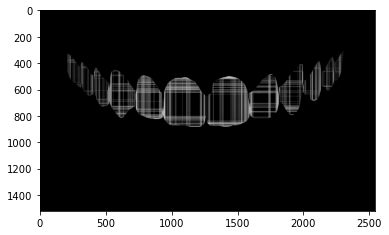

In [10]:
plt.imshow(m,cmap='gray')

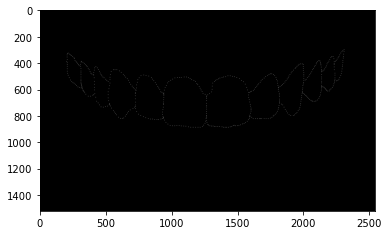

In [11]:
# jsut to show the json dots

new=np.zeros(np.shape(photo))
n=np.array(data['layers'][0]['paths']).size
for q in range(n):
    points=np.array(data['layers'][0]['paths'][q]['points'])
    for point in points:
        y,x=point
        x=np.int(np.round(x))
        y=np.int(np.round(y))
        for i in range(3):
            for j in range(3):
                new[(x+i),(y+j)]=np.array([1])
plt.imshow(new,cmap='gray')